# X and y Data Creation

In [2]:
import numpy as np
from obspy import read
from mseed2npy import integrate_preprocessing_and_labeling

stream = read('raw_mseeds/krbg.mseed')
stream.merge()
# Preprocess data and create labels
X_data, y_precise, y_condensed = integrate_preprocessing_and_labeling(
    stream, 
    'station_arrivals.csv', 
    output_dir='processed_data'
)

# Quick data exploration
print("X data shape:", X_data.shape)
print("Precise labels shape:", y_precise.shape)
print("Condensed labels shape:", y_condensed.shape)

# Check number of earthquake windows
print("\nEarthquake event windows:")
print("Total windows:", len(y_condensed))
print("Windows with events:", np.sum(y_condensed))
print("Percentage of event windows: {:.2f}%".format(np.mean(y_condensed)*100))

Latest start time:  2020-09-08T23:58:18.900000Z
Earliest end time:  2020-09-09T22:52:26.730000Z
Stream saved at: processed_data/KO.KRBG.20200908_235818.npy
Shape of saved data: (2748, 3000, 6)
[False False False ... False False False]
X data shape: (2748, 3000, 6)
Precise labels shape: (2748, 3000)
Condensed labels shape: (2748,)

Earthquake event windows:
Total windows: 2748
Windows with events: 61
Percentage of event windows: 2.22%


In [1]:
2748*30

82440

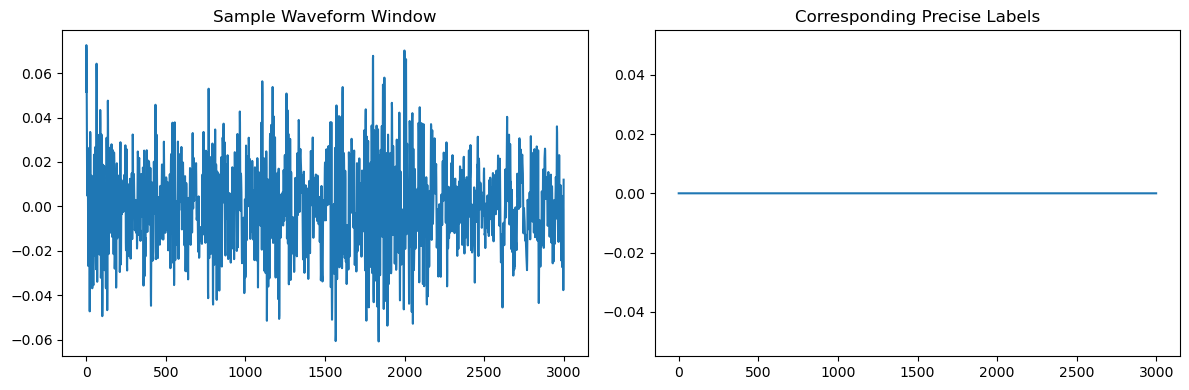

In [3]:
# Optional: Visualize data
import matplotlib.pyplot as plt

# Plot a sample window
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title("Sample Waveform Window")
plt.plot(X_data[0, :, 0])  # First window, first channel
plt.subplot(122)
plt.title("Corresponding Precise Labels")
plt.plot(y_precise[0])
plt.tight_layout()
plt.show()

In [5]:
y_condensed.shape

(2748,)

In [4]:
plt.matshow(y_condensed)

ValueError: not enough values to unpack (expected 2, got 1)

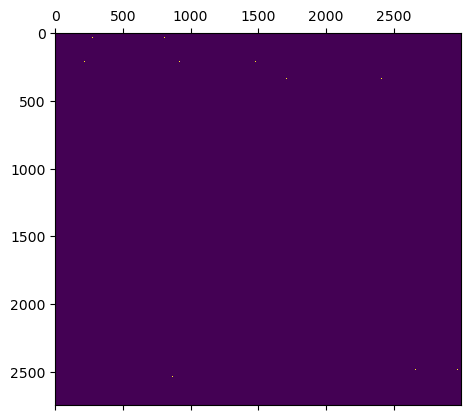

In [31]:
plt.matshow(y_precise)

In [25]:
npy = np.load("/home/ege/rawcovar/catalog_implementation/processed_data/KO.SUSR.20200111_033113.npy")

In [26]:
npy.shape

(791, 3000, 3)

In [20]:
y_precise.shape

(2748, 3000)

In [21]:
y_condensed.shape

(2748,)

In [22]:
np.save('y_precise.npy', y_precise)
np.save('y_condensed.npy', y_condensed)
